In [1]:
import numpy as np
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering\\models\\playground'

In [3]:
# if necessary, change to drone_steering directory.
os.chdir('../..')
os.getcwd()

'C:\\Users\\p.schambach\\Desktop\\DSR\\drone_steering'

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from app_local.module import LabelGenerator, DataEnsembler, GestureTransformer

In [5]:
de = DataEnsembler(ms_per_frame=120)

data_directory = 'data/gesture/'
de.investigate_available_datafiles( data_dir = data_directory)

de.combined_data_files_df

,filename_features,filename_labels
0,features_flip_c_01_120.csv,labels_flip_c_01.csv
1,features_flip_c_02_120.csv,labels_flip_c_02.csv
2,features_flip_c_03_120.csv,labels_flip_c_03.csv
3,features_flip_l_01_120.csv,labels_flip_l_01.csv
4,features_flip_l_02_120.csv,labels_flip_l_02.csv
5,features_flip_l_03_120.csv,labels_flip_l_03.csv
6,features_flip_p_01_120.csv,labels_flip_p_01.csv
7,features_land_c_01_120.csv,labels_land_c_01.csv
8,features_land_c_02_120.csv,labels_land_c_02.csv
9,features_land_c_03_120.csv,labels_land_c_03.csv


In [6]:
de.load_data()
de.assemble_data(tolerance_range = 600, max_error = 700)
de.display_information()

i: 0 	shape X: (537, 17, 16) 	shape y: (537,) 	count: 61
i: 1 	shape X: (520, 17, 16) 	shape y: (520,) 	count: 71
i: 2 	shape X: (499, 17, 16) 	shape y: (499,) 	count: 75
i: 3 	shape X: (557, 17, 16) 	shape y: (557,) 	count: 116
i: 4 	shape X: (509, 17, 16) 	shape y: (509,) 	count: 66
i: 5 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 65
i: 6 	shape X: (532, 17, 16) 	shape y: (532,) 	count: 67
i: 7 	shape X: (441, 17, 16) 	shape y: (441,) 	count: 46
i: 8 	shape X: (491, 17, 16) 	shape y: (491,) 	count: 51
i: 9 	shape X: (477, 17, 16) 	shape y: (477,) 	count: 55
i: 10 	shape X: (493, 17, 16) 	shape y: (493,) 	count: 42
i: 11 	shape X: (437, 17, 16) 	shape y: (437,) 	count: 36
i: 12 	shape X: (467, 17, 16) 	shape y: (467,) 	count: 50
i: 13 	shape X: (649, 17, 16) 	shape y: (649,) 	count: 85
i: 14 	shape X: (588, 17, 16) 	shape y: (588,) 	count: 60
i: 15 	shape X: (565, 17, 16) 	shape y: (565,) 	count: 86
i: 16 	shape X: (541, 17, 16) 	shape y: (541,) 	count: 0
i: 17 	shape X: (470, 17

In [7]:
feature_names = list(de.LabelGenerators[0].feature_names)
feature_names

['leftElbow_x',
 'leftElbow_y',
 'leftHip_x',
 'leftHip_y',
 'leftShoulder_x',
 'leftShoulder_y',
 'leftWrist_x',
 'leftWrist_y',
 'rightElbow_x',
 'rightElbow_y',
 'rightHip_x',
 'rightHip_y',
 'rightShoulder_x',
 'rightShoulder_y',
 'rightWrist_x',
 'rightWrist_y']

In [8]:
gt = GestureTransformer(feature_names)
P = gt.transform(de.X)

In [9]:
print(de.X.shape)
print(P.shape)

(11723, 17, 16)
(11723, 17, 16)


In [10]:
print("x_shift:",gt.x_shift.shape)
print("y_shift:",gt.y_shift.shape)
print("scale:",gt.scale.shape)

x_shift: (11723, 17)
y_shift: (11723, 17)
scale: (11723, 17)


## Analysis of "Smoothness" of Normalization Arrays

In [11]:
# The tranform operation is idempotent
X = de.X.copy()
print(X.shape)
gt = GestureTransformer(feature_names)
P1 = gt.transform(X)
print(P1.shape)
P2 = gt.transform(P1)
print((~np.isclose(gt.x_shift,0)).sum)
print((~np.isclose(gt.y_shift,0)).sum())
print((~np.isclose(gt.scale,1)).sum())

(11723, 17, 16)
(11723, 17, 16)
<built-in method sum of numpy.ndarray object at 0x0000017B6CEA2580>
0
0


In [12]:
import matplotlib.pyplot as plt

gts = []
for i, lgen in enumerate(de.LabelGenerators):
    _ = GestureTransformer(feature_names)
    
    info = {}
    dat = lgen.data.values
    _.transform(dat.reshape(1,dat.shape[0],dat.shape[1]))
    
    info["shape"] = dat.shape
    info["x_shift"] = _.x_shift[0]
    info["y_shift"] = _.y_shift[0]
    info["scale"] = _.scale[0]
    
    gts.append(info)

features_flip_c_01_120.csv 	 rightWrist_x


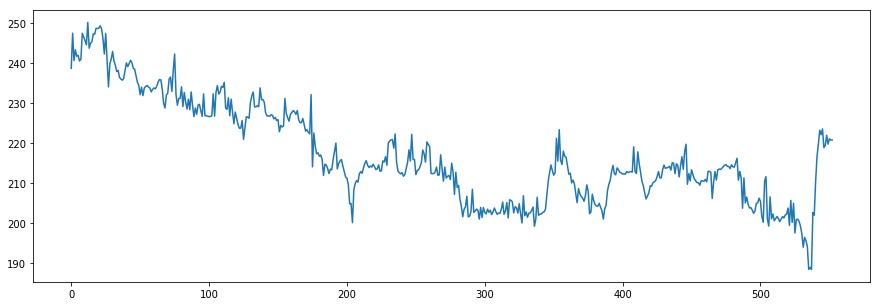

In [45]:
i = 0
j = 14
title = de.combined_data_files_df.iloc[i]["filename_features"]
lgen = de.LabelGenerators[i]
feature = lgen.feature_names[j]
print(title,'\t', feature)
plt.figure(figsize=(15, 5))
plt.plot(de.LabelGenerators[0].data.values[:,j])
plt.show()
plt.close()

features_flip_c_01_120.csv


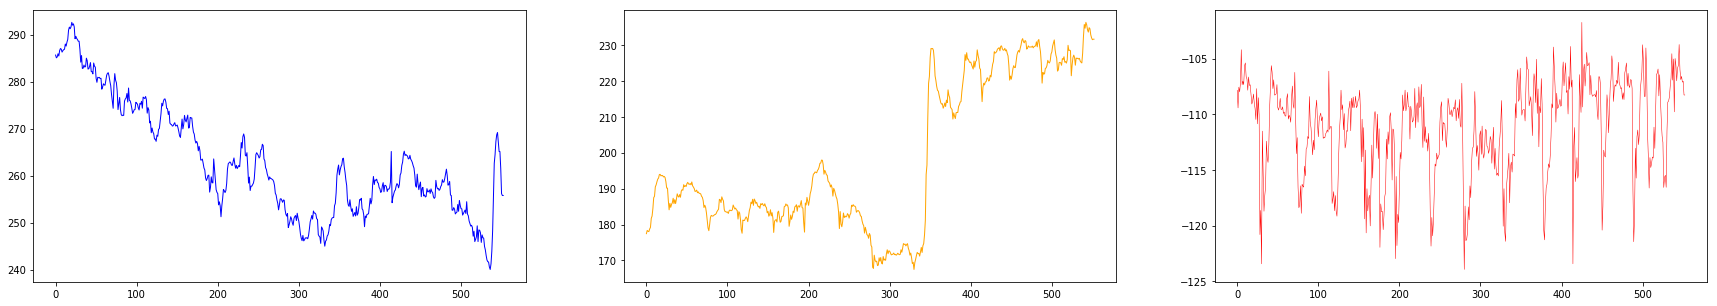

features_flip_c_02_120.csv


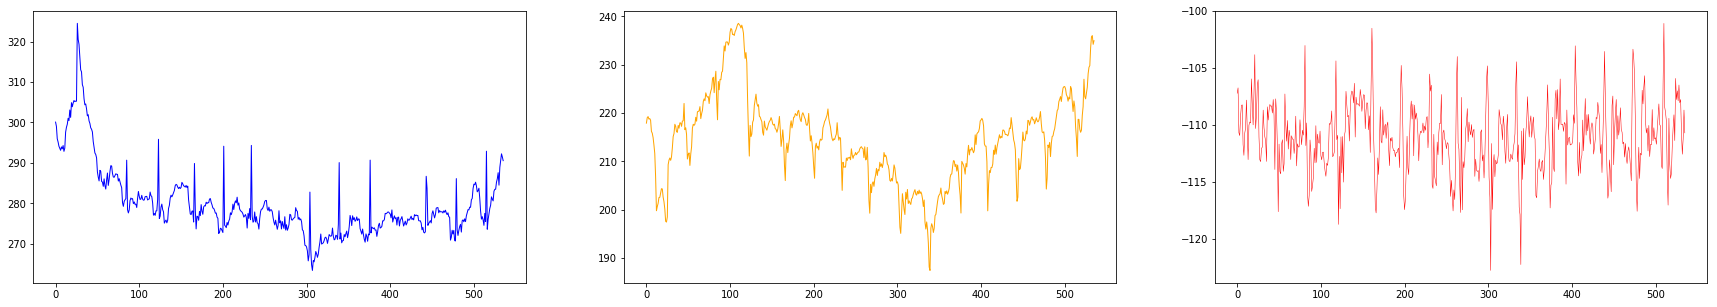

features_flip_c_03_120.csv


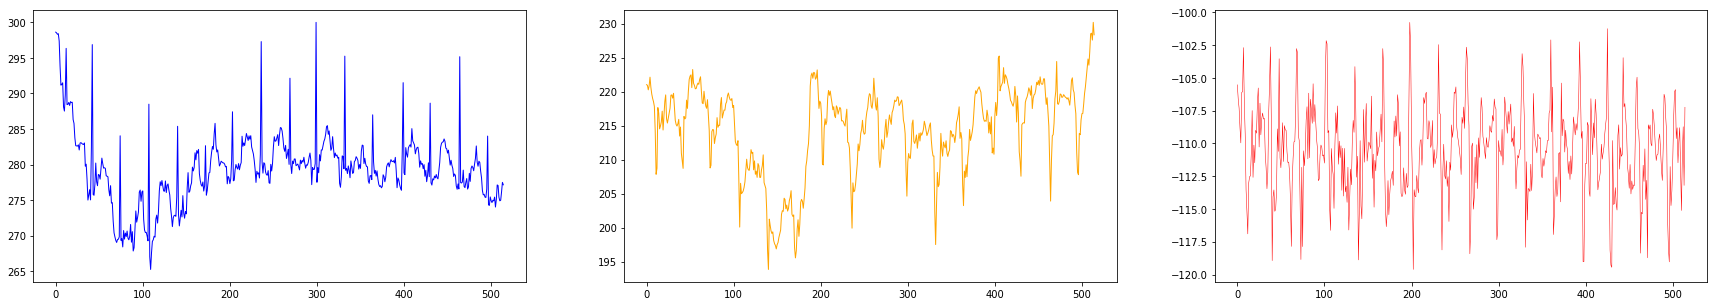

features_flip_l_01_120.csv


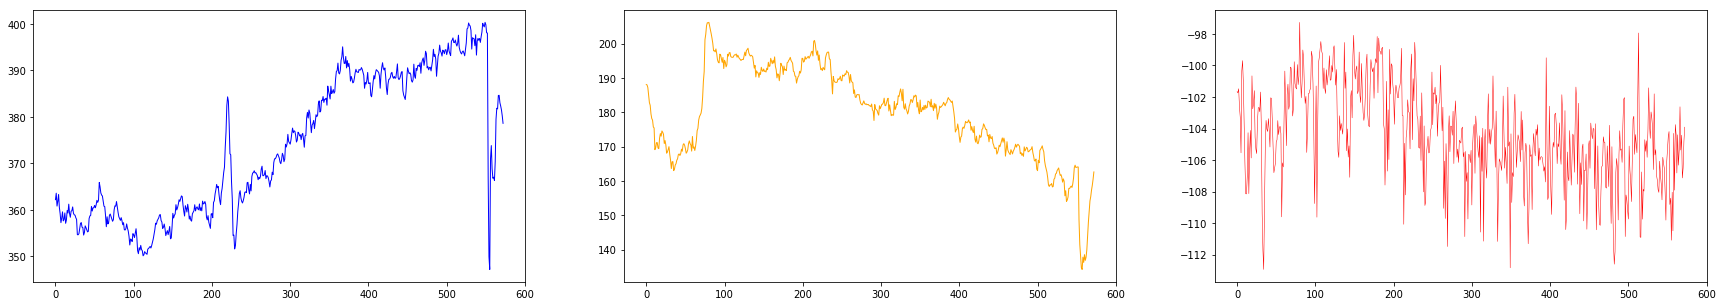

features_flip_l_02_120.csv


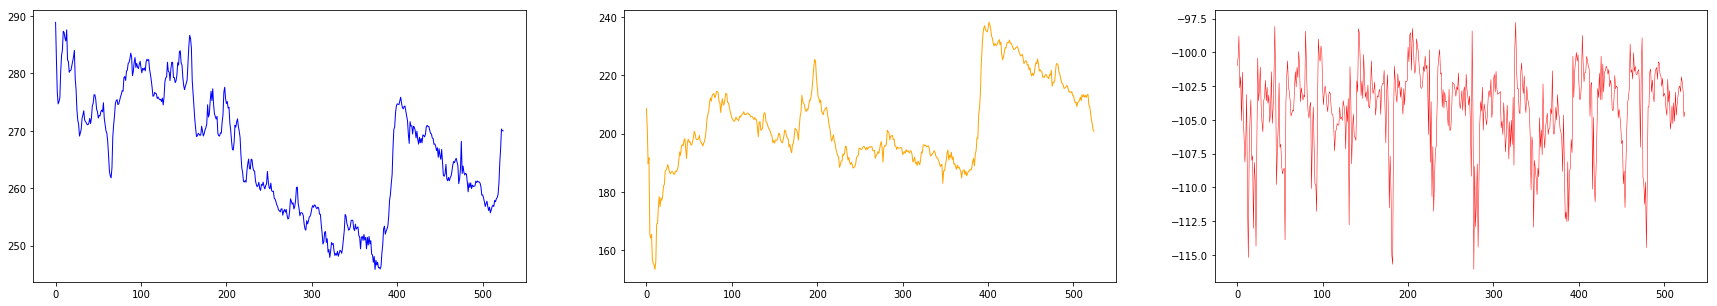

features_flip_l_03_120.csv


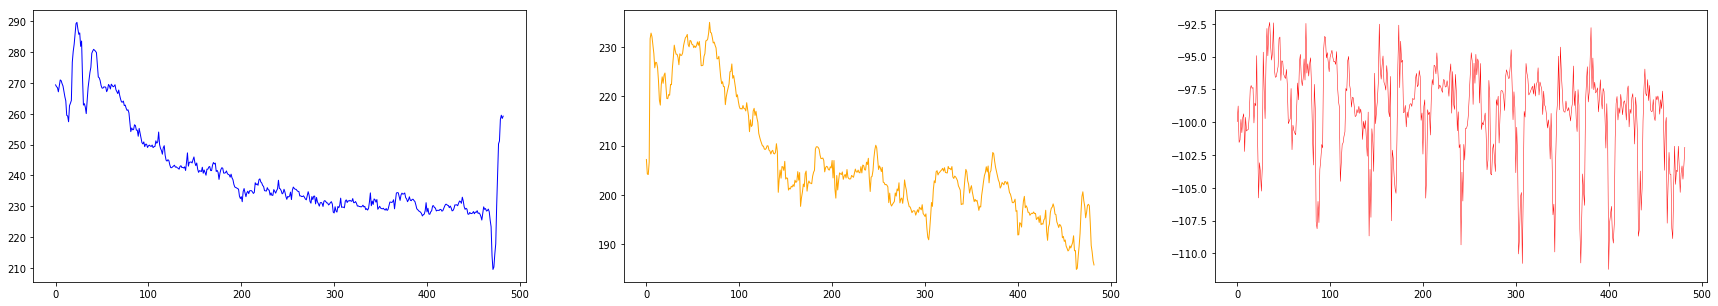

features_flip_p_01_120.csv


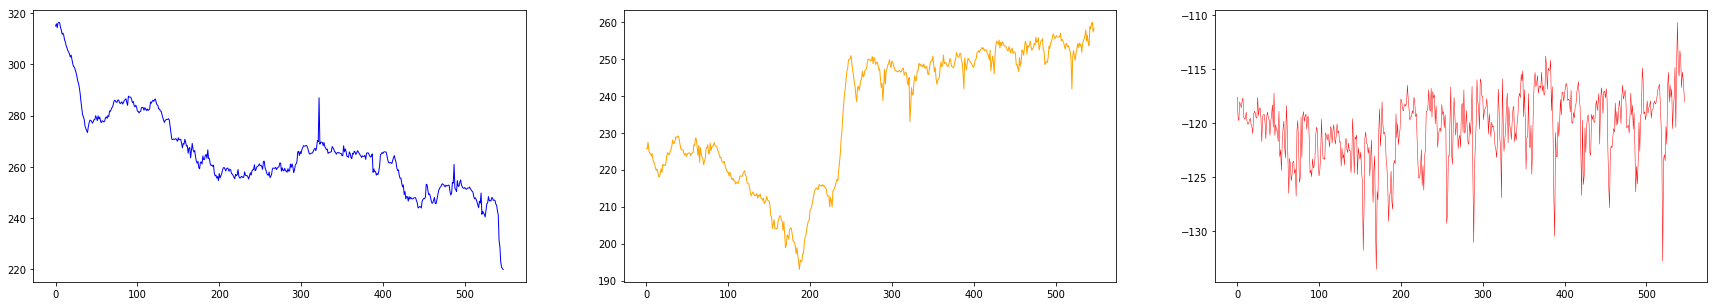

features_land_c_01_120.csv


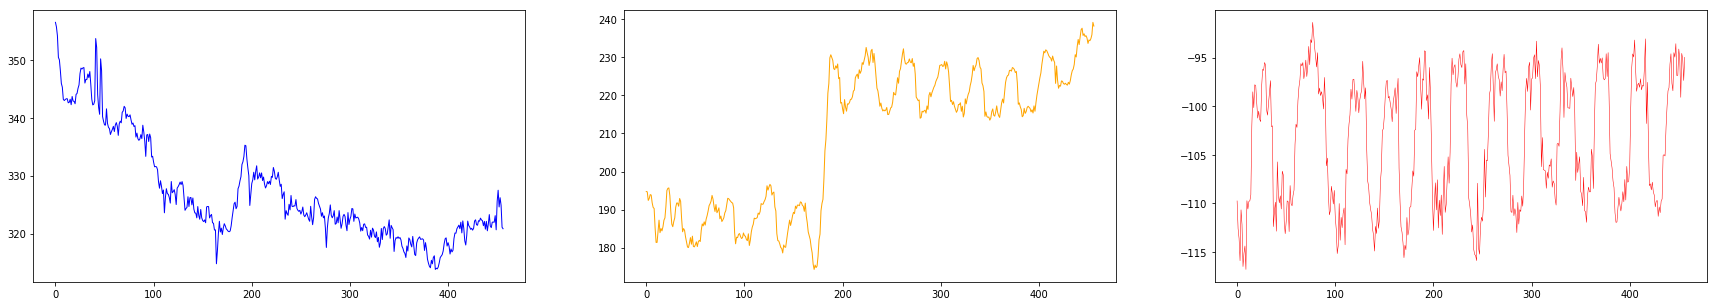

features_land_c_02_120.csv


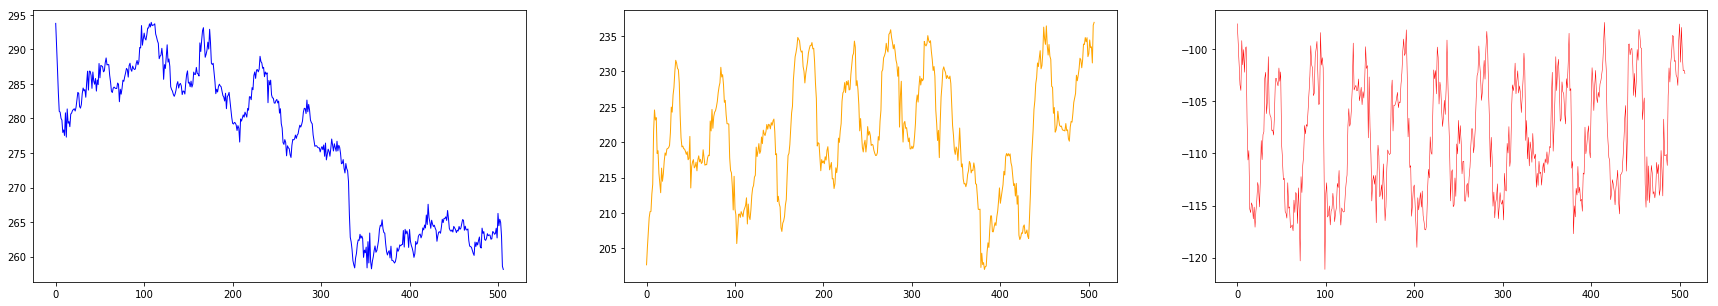

features_land_c_03_120.csv


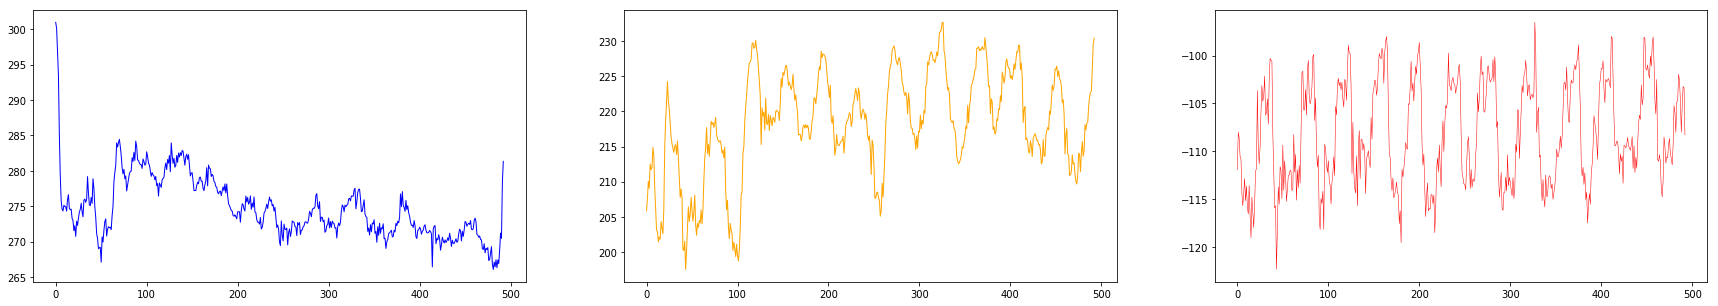

features_land_l_01_120.csv


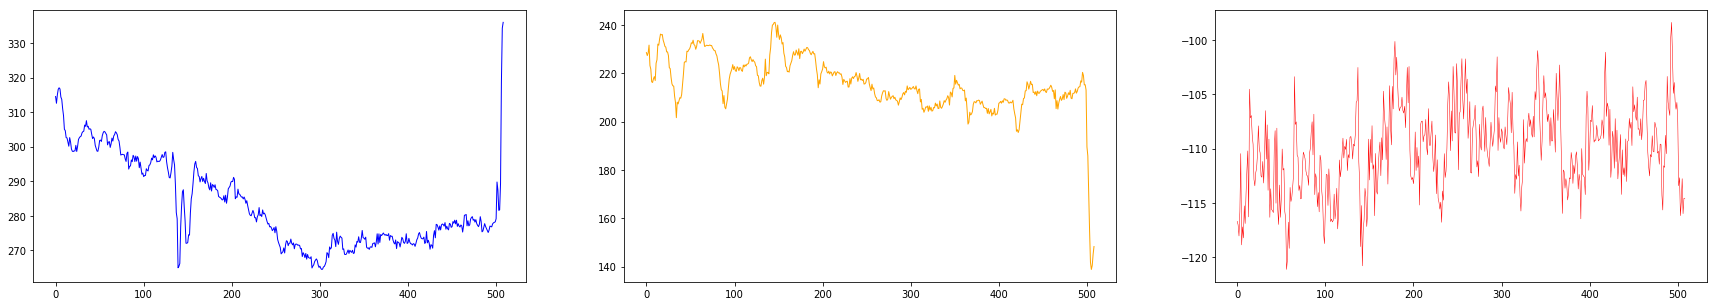

features_land_l_02_120.csv


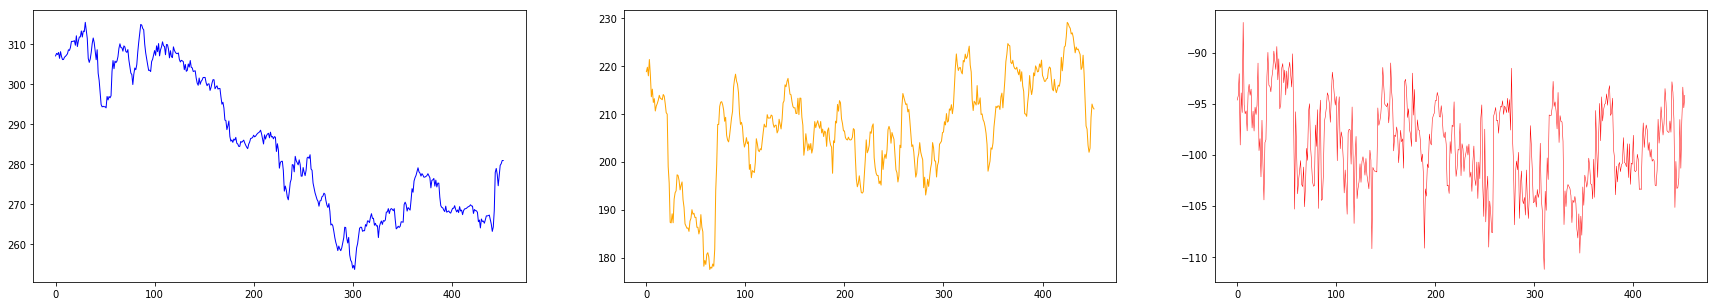

features_land_l_03_120.csv


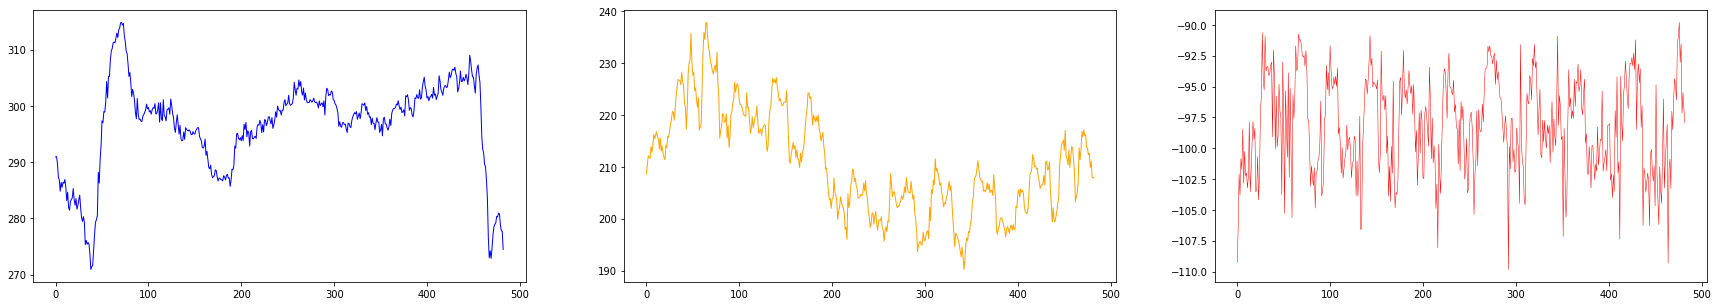

features_move_c_01_120.csv


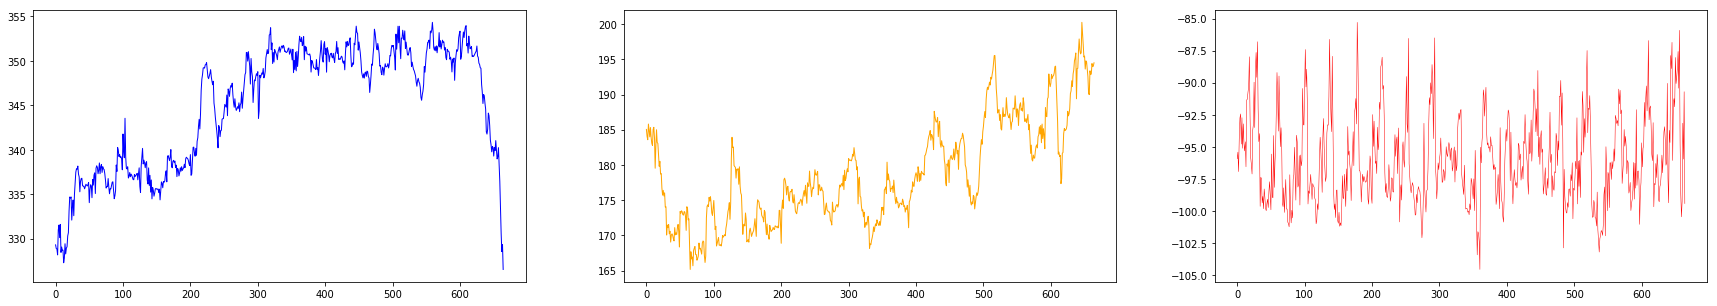

features_move_l_01_120.csv


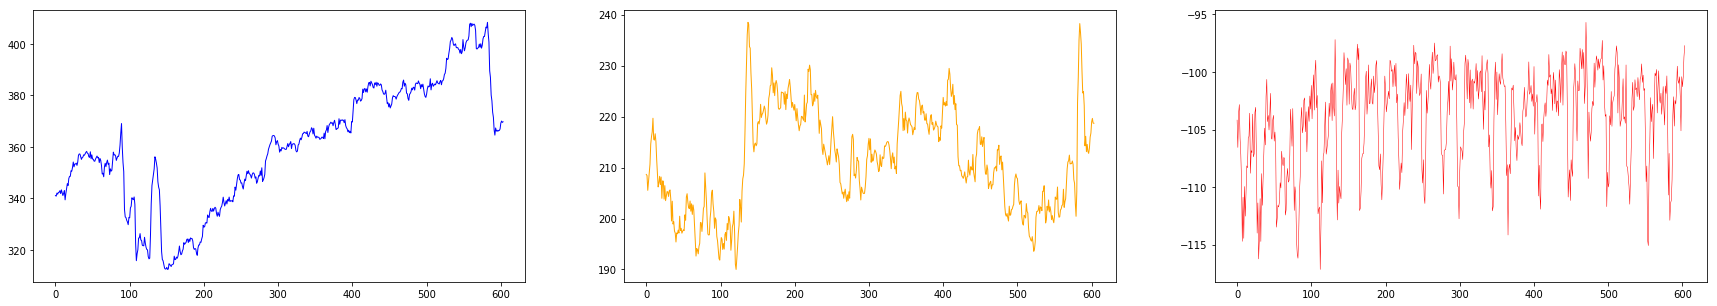

features_move_p_01_120.csv


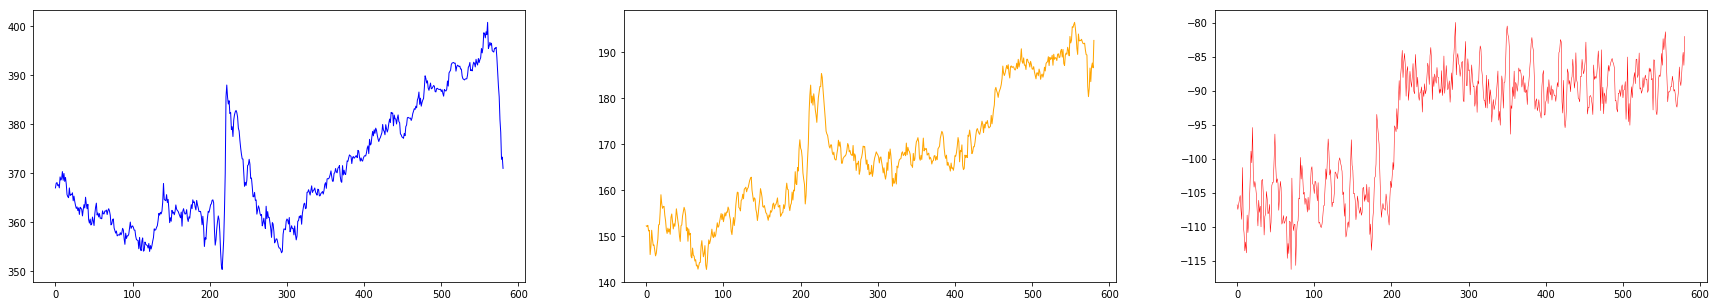

features_none_p_01_120.csv


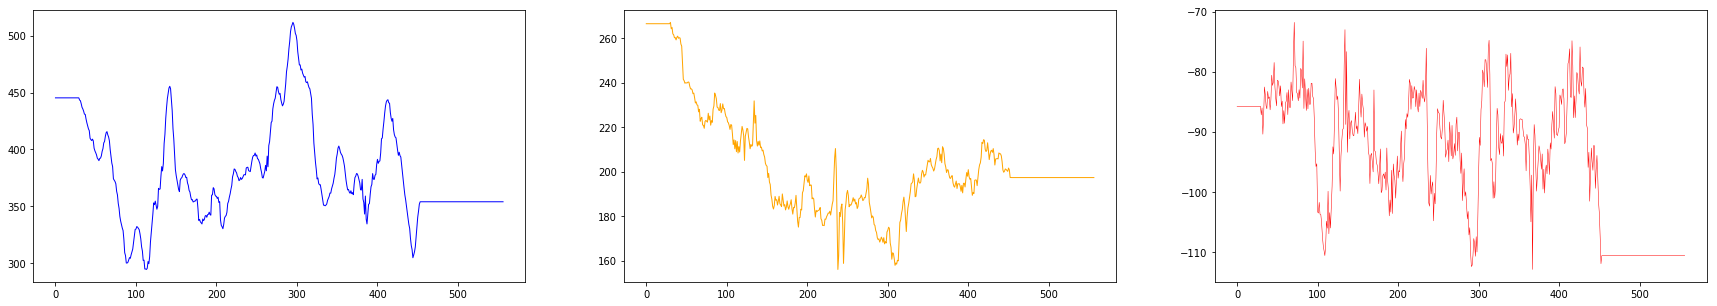

features_takeoff_c_01_120.csv


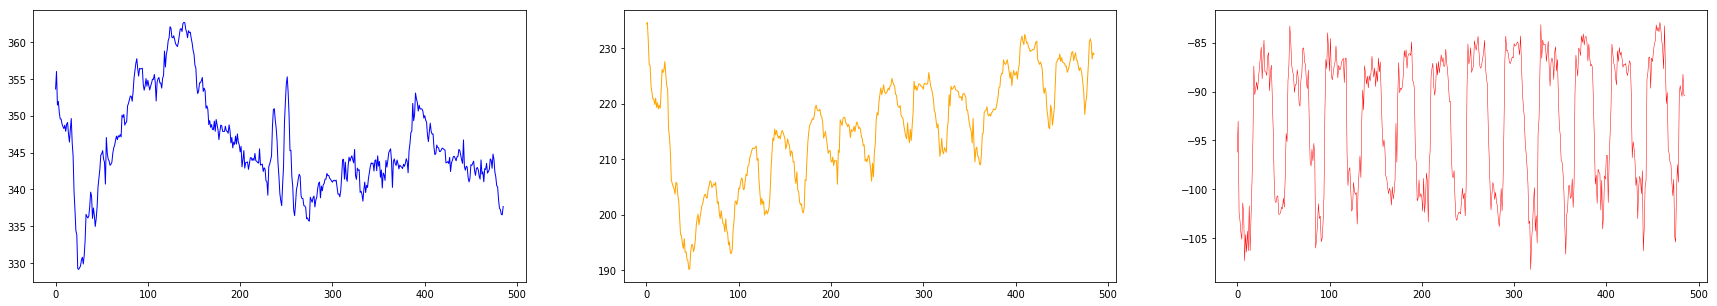

features_takeoff_c_02_120.csv


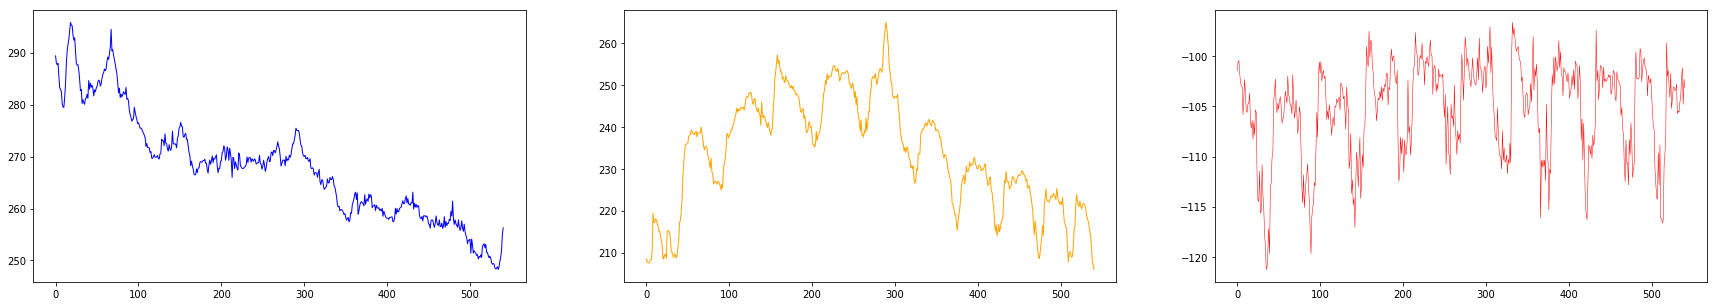

features_takeoff_c_03_120.csv


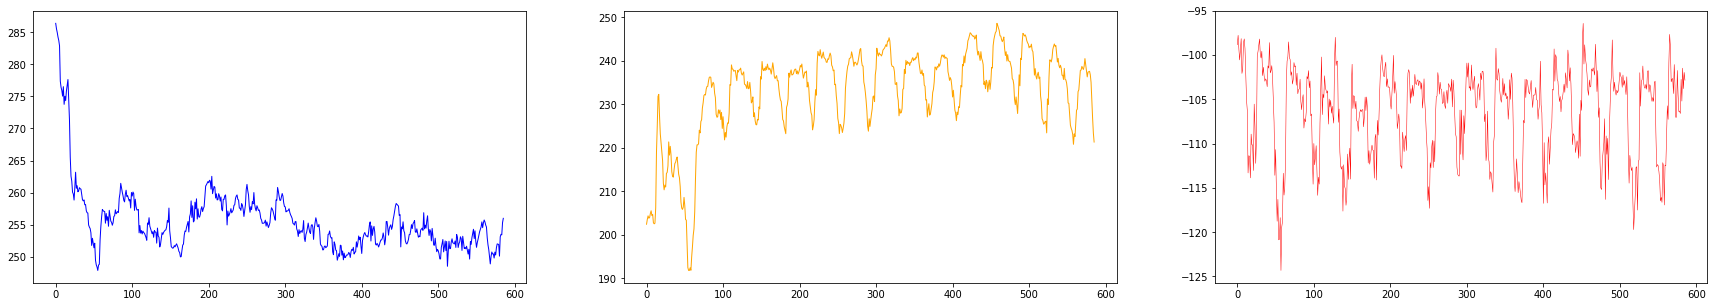

features_takeoff_l_01_120.csv


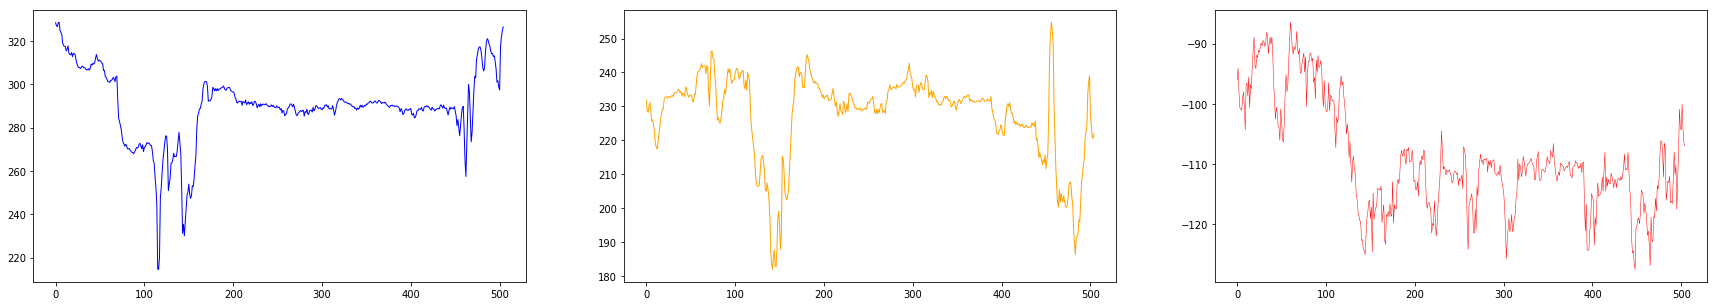

features_takeoff_l_02_120.csv


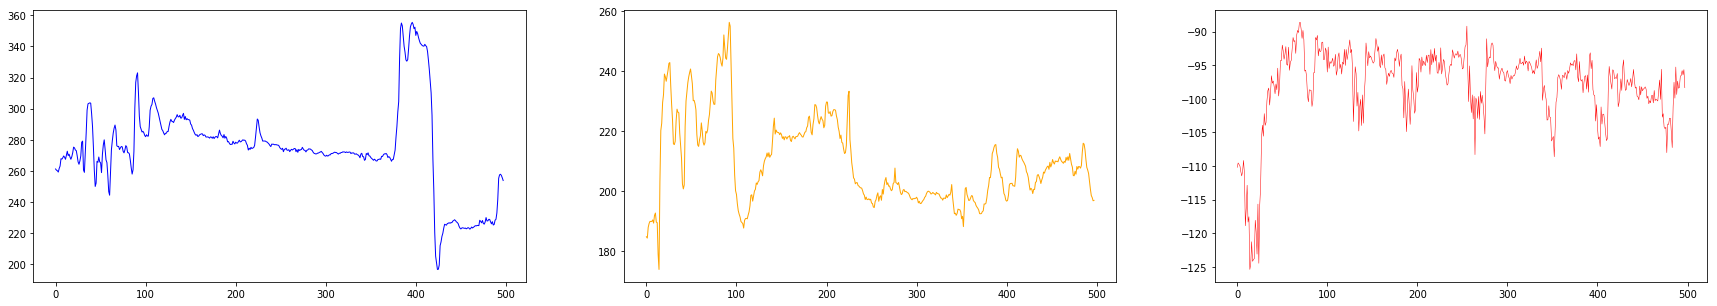

features_takeoff_l_03_120.csv


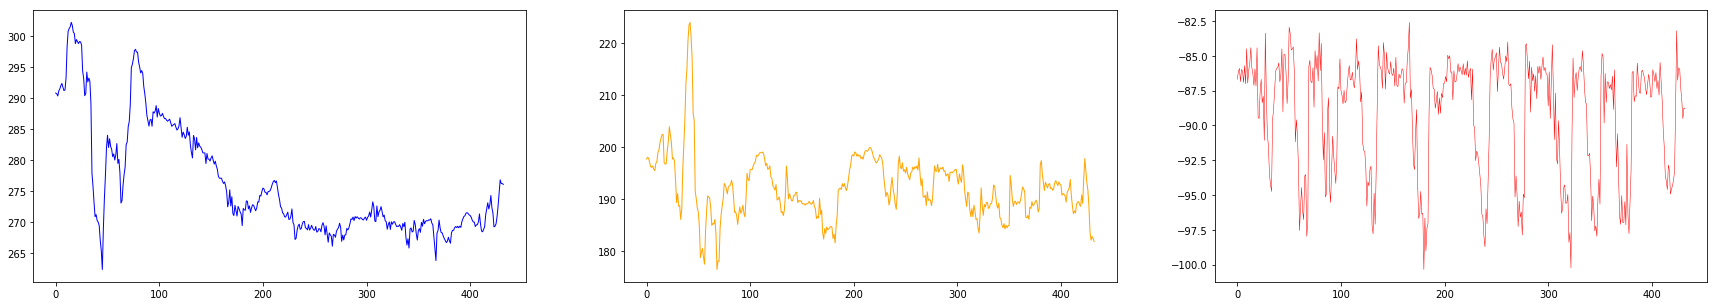

In [22]:
plots_per_row = 3

for i,gt in enumerate(gts):

    title = de.combined_data_files_df.iloc[i]["filename_features"]
    print(title)
    
    plt.figure(figsize=(10*plots_per_row, 5))

    plt.subplot(1,3,1)
    plt.plot(gt["x_shift"], color = 'blue',linewidth=1)

    plt.subplot(1,3,2)
    plt.plot(gt["y_shift"], color = 'orange',linewidth=1)

    plt.subplot(1,3,3)
    plt.plot(gt["scale"],color = 'red',linewidth=0.5)

    plt.show()
    plt.close()

